In [1]:
import copy
from glob import glob
from cv2 import resize
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## prepare data

In [2]:
# load data
calsses_path = glob("D:/projects data/dataset/cats vs dogs/*")

X = []
Y = []
img_class=-1

for folder in calsses_path:
    class_imgs = glob(folder+"/*")
    img_class = img_class+1
    for file in class_imgs:
        img = plt.imread(file)
        X.append(resize(img,(64,64)))
        Y.append(img_class)
        
X = np.array(X)
Y = np.array(Y)
X.shape,Y.shape

((20, 64, 64, 3), (20,))

(0, <matplotlib.image.AxesImage at 0x23c800375b0>)

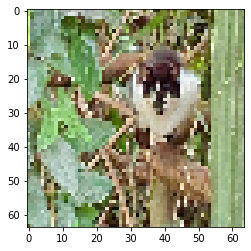

In [3]:
# visualize data
Y[0],plt.imshow(X[0])

(1, <matplotlib.image.AxesImage at 0x23c800d24f0>)

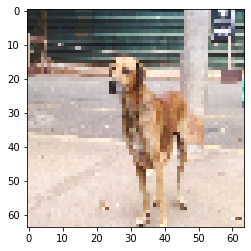

In [4]:
# visualize data
Y[14],plt.imshow(X[14])

In [5]:
# normalize data
X = X/255.0
X.max()

1.0

In [6]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [7]:
# flat images
X_train = X_train.reshape(X_train.shape[0],-1).T
X_test = X_test.reshape(X_test.shape[0],-1).T

## build model

In [8]:
def sigmoid(z):
        
    return 1/(1+np.exp(-z))

In [9]:
def initialize_parameters(dim):
    
    w = np.zeros((dim,1))
    b = 0.0
    
    return w, b

In [10]:
# calculate the deravatives of the parameteres according to the cost
def propagate(w, b, X, Y):
    
    m = X.shape[1]
   
    A = sigmoid(np.dot(w.T,X)+b)
    
    # calculate the log loss (binary cross entropy)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    # w,b deravitives
    dw = (1/m)*X@(A-Y).T
    db = (1/m)*np.sum(A-Y)

    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [11]:
# optimize the weights and bias 
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):

    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        print ("iteration num %i" %(i))
        grads, cost = propagate(w,b,X,Y)
        
        # update w,b
        dw = grads["dw"]
        db = grads["db"]
        w = w-(learning_rate*dw)
        b = b-(learning_rate*db)
        
        if i % 100 == 0:
            costs.append(cost)
        
            if print_cost:
                print ("the Cost is %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [12]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    

    A = sigmoid(np.dot(w.T,X)+b)
    
    
    for i in range(A.shape[1]):
        
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [13]:
def train_model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
  
    w, b = initialize_parameters(X_train.shape[0])
    
    params, grads, costs = optimize(w ,b ,X_train ,Y_train ,num_iterations, learning_rate, print_cost)
    
    w = params["w"]
    b = params["b"]
    
    Y_prediction_test = predict(w ,b ,X_test)
    Y_prediction_train = predict(w ,b ,X_train)

    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [14]:
LR_model = train_model(X_train, y_train, X_test, y_test, num_iterations=20, learning_rate=0.005, print_cost=True)

iteration num 0
the Cost is 0: 0.693147
iteration num 1
iteration num 2
iteration num 3
iteration num 4
iteration num 5
iteration num 6
iteration num 7
iteration num 8
iteration num 9
iteration num 10
iteration num 11
iteration num 12
iteration num 13
iteration num 14
iteration num 15
iteration num 16
iteration num 17
iteration num 18
iteration num 19
train accuracy: 62.5 %
test accuracy: 75.0 %


## predict image

In [15]:
X_test.shape[0]

12288

y true= 0, y predected = 0.0


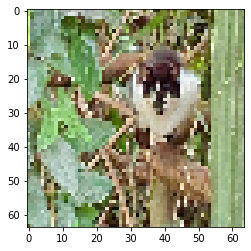

In [16]:
# We preprocess the image to fit your algorithm.
px = int(np.sqrt(X_test.shape[0]/3))
image = X_test[:,3]
plt.imshow(image.reshape(px , px , 3))
image = image.reshape((1, px * px * 3))
my_prediction = predict(LR_model["w"], LR_model["b"], image.T)

print("y true= " + str(y_test[3]) + ", y predected = " +str(np.squeeze(my_prediction)))